#  <span style="color:orange">Despliegue de modelos de ML con Pycaret en Microsoft Azure </span>

Para este tutorial nos basaremos en el tutorial oficial de Pycaret (https://pycaret.org) y de https://gist.github.com/amjadraza/

## Parte I

## Instalando pycaret

In [5]:
!pip install pycaret

     |████████████████████████████████| 266kB 5.4MB/s 
     |████████████████████████████████| 102kB 3.8MB/s 
     |████████████████████████████████| 276kB 7.1MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 2.0MB 9.0MB/s 
     |████████████████████████████████| 245kB 25.5MB/s 
     |████████████████████████████████| 14.2MB 263kB/s 
     |████████████████████████████████| 215kB 33.4MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 6.8MB 42.3MB/s 
     |████████████████████████████████| 1.7MB 36.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2MB 37.3MB/s 
     |████████████████████████████████| 81kB 6.5MB/s 
     |████████████████████████████████| 1.1MB 38.5MB/s 
     |████████████████████████████████| 3.2MB 37.9MB/s 
 

## Montaje del Gdrive

Necesitamos montar la unidad de Google para leer los datos en el entorno de colab. A continuación se muestra la forma más sencilla de montarlo. Se le pedirá que ingrese el token generado por su procedimiento de acceso.

Guardaremos los modelos localmente en Google Drive para este tutorial.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Creemos un directorio para guardar modelos localmente.

In [7]:
# Create directory on google drive to save models locally. You can use temp paths.
import os
model_dir = '/content/drive/My Drive/azure_deploy_model/'
os.makedirs(model_dir, exist_ok=True)

# Obteniendo los datos

Usaremos el repositorio de datos de PyCaret para cargar los datos usando la función `get_data ()` (Esto requerirá conexión a Internet).

In [8]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [9]:
#check the shape of data
dataset.shape

(6000, 8)

In [10]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


# Configuración del entorno en PyCaret
Generaremos el pipeline de preprocesamiento utilizando la funcion de setup de Pycaret

In [11]:
from pycaret.regression import *

In [12]:
exp_reg101 = setup(data = data, target = 'Price', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


## Parte II

## Crea un modelo de Light GBM
Para este tutorial generaremos un modelo de ML de Light GBM. Pycaret dispone de multiples modelos


In [13]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,625.1813,1.051763e+06,1025.5550,0.9885,0.0715,0.0526
1,797.6185,5.638866e+06,2374.6297,0.9568,0.0727,0.0537
2,829.4586,3.328375e+06,1824.3836,0.9695,0.0860,0.0619
3,720.3923,1.697211e+06,1302.7707,0.9813,0.0714,0.0554
4,645.6800,1.799949e+06,1341.6218,0.9775,0.0745,0.0534
5,830.7176,6.423604e+06,2534.4830,0.9452,0.0810,0.0567
6,799.9136,3.353992e+06,1831.3908,0.9685,0.0793,0.0585
7,714.3607,1.930223e+06,1389.3245,0.9756,0.0732,0.0556
8,784.7648,2.211933e+06,1487.2569,0.9783,0.0766,0.0582
9,778.3590,3.127561e+06,1768.4913,0.9702,0.0872,0.0609


## Optimizacion de hiperparametros de Light Gradient Boosting Machine


In [14]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,793.3856,1.716621e+06,1310.1989,0.9812,0.1080,0.0745
1,990.1703,7.448985e+06,2729.2829,0.9429,0.1057,0.0740
2,905.1469,3.415442e+06,1848.0916,0.9687,0.1106,0.0772
3,772.6203,1.997386e+06,1413.2892,0.9780,0.0979,0.0699
4,806.9473,2.127323e+06,1458.5347,0.9735,0.1114,0.0774
5,956.3217,7.042348e+06,2653.7423,0.9399,0.1047,0.0732
6,921.6292,4.022330e+06,2005.5747,0.9622,0.1009,0.0717
7,855.5451,2.950657e+06,1717.7476,0.9627,0.1006,0.0729
8,841.9770,2.712034e+06,1646.8254,0.9734,0.0847,0.0654
9,853.2522,3.208950e+06,1791.3542,0.9694,0.1067,0.0745


## Evaluación del Modelo
A continuación se muestran los gráficos para ver los errores residuales del modelo.

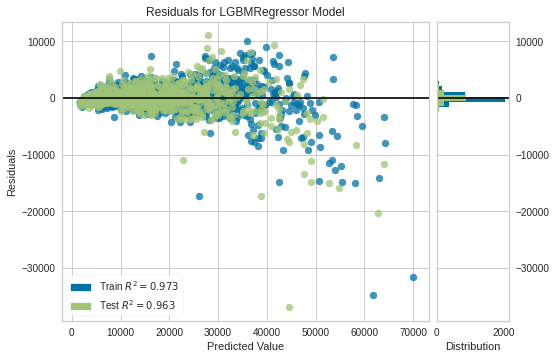

In [15]:
plot_model(tuned_lightgbm)

## Gráfica de error de predicción
Utilicemos el gráfico de los errores de predicción frente a los valores reales del objetivo.

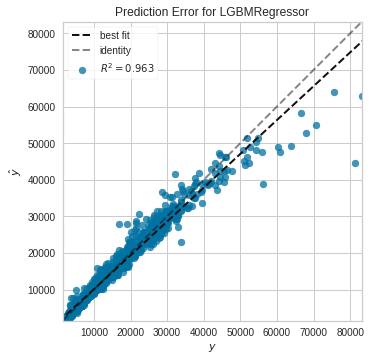

In [16]:
plot_model(tuned_lightgbm, plot = 'error')

## Importancia de características
La importancia de la característica es un gráfico muy informativo para ver la contribución de cada característica en el modelo.

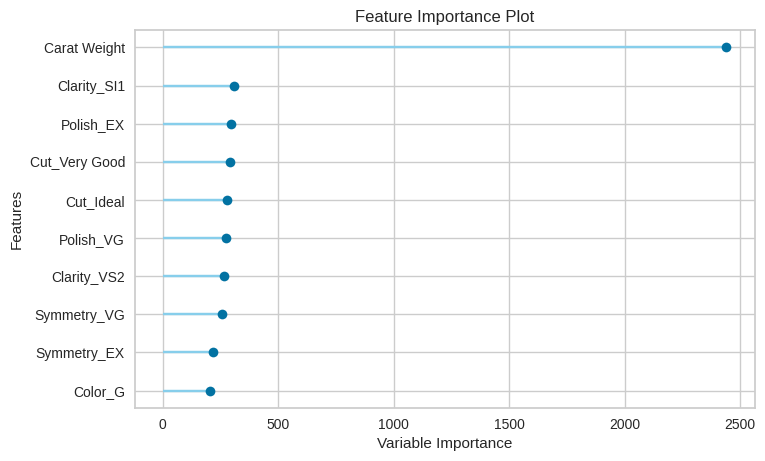

In [17]:
plot_model(tuned_lightgbm, plot='feature')

Otra forma de analizar el rendimiento de los modelos es usar la función `eval_model ()` que muestra una interfaz de usuario para todos los gráficos disponibles para un modelo dado. Utiliza internamente la función `plot_model ()`.

In [18]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Predicción con datos de Test

In [19]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,915.0194,4.027395e+06,2006.837,0.9633,0.1042,0.0736


## Finalizar el modelo para el despliegue en producción

In [20]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [21]:
#Final Light Gradient Boosting Machine parameters for deployment
print(final_lightgbm)

LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [22]:
predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,716.722,2.489145e+06,1577.7026,0.9773,0.0798,0.0574


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,1.16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7059.0,6929.713407
1,1.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5809.0,5977.738047
2,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,10641.0,11217.076801
3,0.79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2871.0,2966.709554
4,2.23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,21706.0,21917.839383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12906.0,13716.265502
1617,0.83,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3235.0,3144.719703
1618,1.51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9058.0,9006.546685
1619,1.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5091.0,5054.786947


## Predict on unseen data

In [23]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,10668.640318
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,15603.481015
2,1.51,Good,F,SI1,VG,G,GIA,10429,10794.863911
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4436.538102
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,4245.761540


La columna `Label` se agrega al conjunto `data_unseen`. La etiqueta es el valor predicho usando el modelo `final_lightgbm`. Si desea redondear las predicciones, puede usar el parámetro `round` dentro de `predict_model () `.

## Guardando el modelo
Primero guardemos el modelo localmente

In [24]:
model_dir
model_name = 'Final_lightgbm_model'

In [25]:
# Saving model to google drive

save_model(final_lightgbm, model_dir + model_name)

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.4,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=41,
                    

## Cargando el modelo guardado

Para cargar un modelo guardado en una fecha futura en el mismo entorno o en uno alternativo, usaríamos la función `load_model ()` de PyCaret y luego aplicaríamos fácilmente el modelo guardado en nuevos datos no vistos para la predicción.

In [26]:
saved_final_lightgbm = load_model(model_dir + model_name)

Transformation Pipeline and Model Successfully Loaded


Una vez que el modelo se carga en el entorno, simplemente puede usarlo para predecir cualquier dato nuevo usando la misma función `predict_model ()`. A continuación, hemos aplicado el modelo cargado para predecir el mismo "data_unseen" que usamos en la sección anterior.

In [27]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [28]:
new_prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,10668.640318
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,15603.481015
2,1.51,Good,F,SI1,VG,G,GIA,10429,10794.863911
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4436.538102
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,4245.761540


Observe que los resultados de "predicciones_invisibles" y "predicciones_nueva" son idénticos.

## Parte III

# Despliegue de modelos entrenados en Microsoft Azure

Microsoft Azure es uno de los mayores proveedores de nube y aprendizaje automático en la nube como servicio.

Una vez que tenemos el modelo entrenado, la siguiente tarea es implementarlo para servir a los clientes. Hay varias opciones de implementación disponibles; sin embargo, en esta sección me centro en implementarlo en la plataforma Microsoft Azure. 

Más información en 
> [Lea la Guía de inicio rápido: administre blobs con Python v12 SDK] (https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure % 2FTOC.json)

In [29]:
import os, uuid
!pip install azure-storage-blob==12.3.1
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

     |████████████████████████████████| 286kB 5.6MB/s 
     |████████████████████████████████| 3.2MB 6.2MB/s 
     |████████████████████████████████| 143kB 40.2MB/s 
     |████████████████████████████████| 92kB 8.0MB/s 
     |████████████████████████████████| 51kB 4.1MB/s 


AZURE_STORAGE_CONNECTION_STRING es la cadena de autenticación para conectarse al blob de almacenamiento de Azure. Puede configurar esta cadena en su entorno y puede usar cualquier tiempo. Otra opción es que ingrese su cadena siempre que se necesite conexión.

> El contenedor de almacenamiento de Microsoft Azure se denomina "blob"

In [30]:
# add the connection string in environment

# Linux
! export AZURE_STORAGE_CONNECTION_STRING="<DefaultEndpointsProtocol=https;AccountName=trial23;AccountKey=ghSdWJyw/jrwbj6WJo6E6liby1BGoW1XCKTiRDqPON6e7P+1hleAn2cJHCMDxdG6OcVMsWyj5C3H9Q76DjkrCA==;EndpointSuffix=core.windows.net>"

# After you add the environment variable, restart any running programs that will need to read the environment variable. For example, restart your development environment or editor before continuing.

# Retrieve the connection string for use with the application. The storage
# connection string is stored in an environment variable on the machine
# running the application called AZURE_STORAGE_CONNECTION_STRING. If the environment variable is
# created after the application is launched in a console or with Visual Studio,
# the shell or application needs to be closed and reloaded to take the
# environment variable into account.
connect_str_env = os.getenv('AZURE_STORAGE_CONNECTION_STRING')

Puede ingresar su cadena de conexión en google colab usando el siguiente formulario

In [31]:
## Enter connection string when running in google colab
connect_str = 'DefaultEndpointsProtocol=https;AccountName=trial23;AccountKey=ghSdWJyw/jrwbj6WJo6E6liby1BGoW1XCKTiRDqPON6e7P+1hleAn2cJHCMDxdG6OcVMsWyj5C3H9Q76DjkrCA==;EndpointSuffix=core.windows.net' #@param {type:"string"}
print(connect_str)

DefaultEndpointsProtocol=https;AccountName=trial23;AccountKey=ghSdWJyw/jrwbj6WJo6E6liby1BGoW1XCKTiRDqPON6e7P+1hleAn2cJHCMDxdG6OcVMsWyj5C3H9Q76DjkrCA==;EndpointSuffix=core.windows.net


Para crear la conexión al contenedor de blobs, use el siguiente comando para crear un objeto de cliente de servicio.

In [32]:
# Create the BlobServiceClient object which will be used to create a container client
blob_service_client = BlobServiceClient.from_connection_string(connect_str)

He escrito / recopilado las siguientes utilidades para cargar / descargar datos de blobs.

In [33]:
def create_container(container_name):

  # Create the container
  container_client = blob_service_client.create_container(container_name)

  return container_client

def upload_blob(container_name, source_file_name, destination_blob_name):

  # Create a blob client using the local file name as the name for the blob
  blob_client = blob_service_client.get_blob_client(container=container_name, blob=destination_blob_name)

  print("\nUploading to Azure Storage as blob:\n\t" + source_file_name)

  # Upload the created file
  with open(source_file_name, "rb") as data:
      blob_client.upload_blob(data)

def download_blob(container_name, source_blob_name, destination_file_name):
  # Download the blob to a local file
  print("\nDownloading blob to \n\t" + destination_file_name)

  # Create a blob client using the local file name as the name for the blob
  blob_client = blob_service_client.get_blob_client(container=container_name, blob=source_blob_name)

  if destination_file_name is not None: 
        with open(destination_file_name, "wb") as download_file:
          download_file.write(blob_client.download_blob().readall())

        print(
            "Blob {} downloaded to {}.".format(
                source_blob_name, destination_file_name
            )
        )


## Guardar modelos en un contenedor de Azure

Usando las utilidades anteriores, use el código siguiente para actualizar el modelo a Azure-container. Antes de cargar, creamos el contenedor si no lo hicimos antes.

> Los contenedores también se pueden crear usando GUI.

In [35]:
# Create a unique name for the container
container_name = "pycaret" + str(uuid.uuid4())
container_client = create_container(container_name)

# Save Model Local/google drive and upload to Azure
model_name_azure = 'lightgbm-reg101-azure'
save_model(final_lightgbm, model_name= model_dir + model_name_azure, verbose=False)
model_src = model_dir + model_name_azure +'.pkl'
model_dst = str(model_name)+'.pkl'

In [37]:

upload_blob( container_name, model_src, model_dst)



Uploading to Azure Storage as blob:
	/content/drive/My Drive/azure_deploy_model/lightgbm-reg101-azure.pkl


## Descarga del modelo de Azure para predicciones

Una vez que su modelo se carga en Azure, puede descargarlo en cualquier momento para realizar las predicciones. Sigo un flujo simple, donde el modelo se descarga localmente o en Google Drive primero y luego uso la función `load_model` para cargar el modelo.

In [38]:
print("\nListing blobs...")

# List the blobs in the container
blob_list = container_client.list_blobs()
for blob in blob_list:
    print("\t" + blob.name)

outfile_name = model_dir + 'lightgbm-reg101-azure-downloaded'
model_azure_src = str(model_name)+'.pkl'
download_blob(container_name, model_azure_src, outfile_name + '.pkl')


Listing blobs...
	Final_lightgbm_model.pkl

	/content/drive/My Drive/azure_deploy_model/lightgbm-reg101-azure-downloaded.pkl
Blob Final_lightgbm_model.pkl downloaded to /content/drive/My Drive/azure_deploy_model/lightgbm-reg101-azure-downloaded.pkl.


Use el modelo descargado recientemente de Azure para realizar la predicción.

In [39]:
# Loading the model for predictions
azure_final_lightgbm = load_model(outfile_name)

Transformation Pipeline and Model Successfully Loaded


In [40]:
# Predictions from deployed model
new_prediction_azure = predict_model(azure_final_lightgbm, data=data_unseen)

In [41]:
new_prediction_azure.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,10668.640318
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,15603.481015
2,1.51,Good,F,SI1,VG,G,GIA,10429,10794.863911
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4436.538102
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,4245.761540
